In [3]:
#Heart Attack Prediction 
#Utilised Standard Scalar to standardize the data. 
#Predicted heart attack using Decision Tree Classifier and K Nearest Neighbour Classifier.


In [152]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing #Helps in scaling - standardization or normalization
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [153]:
df = pd.read_csv('heart_attack.csv')

### Step 1: Descriptive Statistics 

In [154]:
df.shape

(294, 14)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [156]:
df.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [157]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


### Step 2: Dealing with Null Values 

In [158]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

### Step 3: Data Cleaning 

In [159]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [160]:
df['chol'] = df['chol'].replace(['?'],0)
df['chol'] = df['chol'].astype(float).replace(0, df['chol'].median())

df['age'] = df['age'].replace(['?'],0)
df['age'] = df['age'].astype(float).replace(0, df['age'].median())

df['trestbps'] = df['trestbps'].replace(['?'],0)
df['trestbps'] = df['trestbps'].astype(float).replace(0, df['trestbps'].median())

df['fbs'] = df['fbs'].replace(['?'],0)

df['restecg'] = df['restecg'].replace(['?'],0)
df['restecg'] = df['restecg'].astype(float).replace(0, df['restecg'].median())

df['exang'] = df['exang'].replace(['?'],0)
df['oldpeak'] = df['oldpeak'].replace(['?'],0)
df['slope'] = df['slope'].replace(['?'],0)
df['ca'] = df['ca'].replace(['?'],0)
df['thal'] = df['thal'].replace(['?'],0)

df['thalach'] = df['thalach'].replace(['?'],0)
df['thalach'] = df['thalach'].astype(float).replace(0, df['thalach'].median())

df.rename(columns = {'num       ': 'target'}, inplace=True)

In [161]:
df.isin(['?']).any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [162]:
#Convert Everything to Float 

for i in df:
    df[i] = df[i].astype(float)

In [163]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28.0,1.0,2.0,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29.0,1.0,2.0,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29.0,1.0,2.0,140.0,237.0,0.0,0.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.0,0.0,1.0,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0.0,0.0,6.0,0.0
4,31.0,0.0,2.0,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 4: Exploratory Data Analysis

<AxesSubplot:xlabel='target', ylabel='count'>

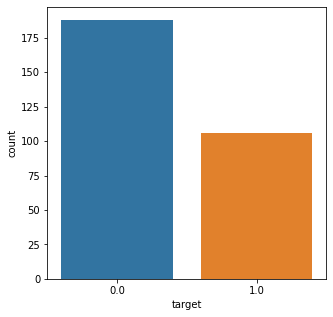

In [164]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x = 'target')

#0 -> Patient is not at Risk
#1 -> Patient is at Risk 

<AxesSubplot:xlabel='sex', ylabel='count'>

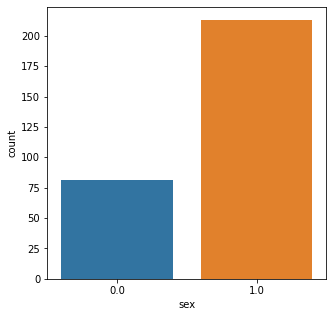

In [165]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='sex')

<AxesSubplot:xlabel='cp', ylabel='count'>

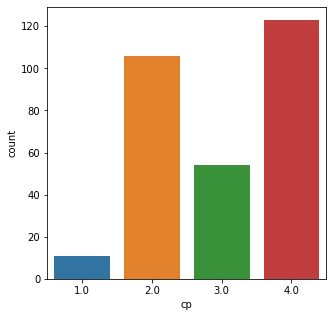

In [166]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='cp')

<AxesSubplot:xlabel='fbs', ylabel='count'>

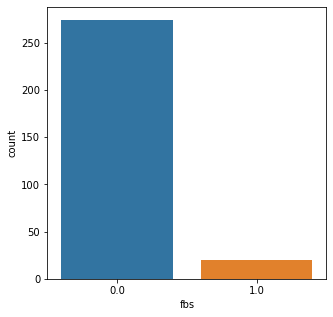

In [167]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='fbs')

<AxesSubplot:xlabel='restecg', ylabel='count'>

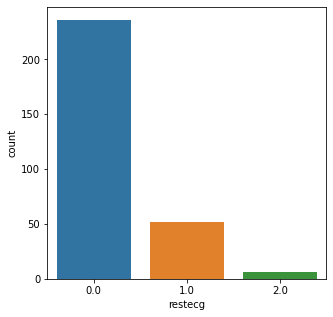

In [168]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='restecg')

<AxesSubplot:xlabel='exang', ylabel='count'>

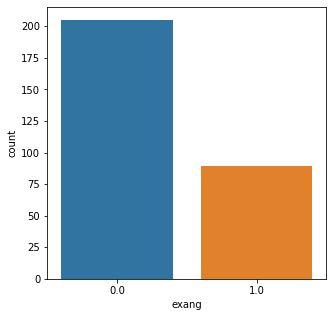

In [169]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='exang')

<AxesSubplot:xlabel='oldpeak', ylabel='count'>

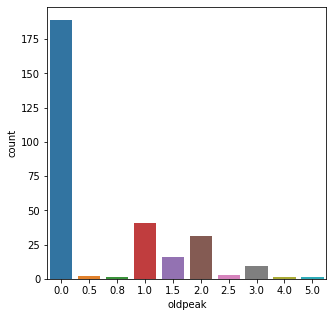

In [170]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='oldpeak')

<AxesSubplot:xlabel='slope', ylabel='count'>

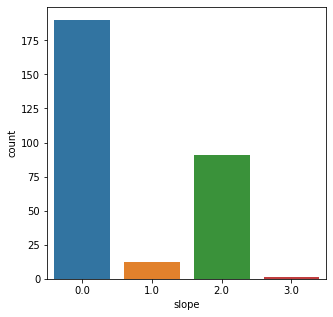

In [171]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='slope')

<AxesSubplot:xlabel='ca', ylabel='count'>

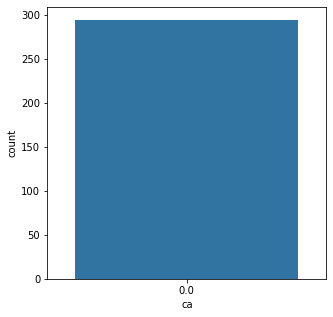

In [172]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='ca')

<AxesSubplot:xlabel='thal', ylabel='count'>

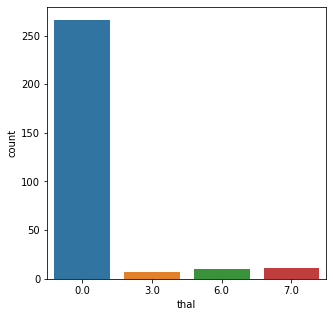

In [173]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='thal')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>],
       [<AxesSubplot:title={'center':'trestbps'}>,
        <AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>],
       [<AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

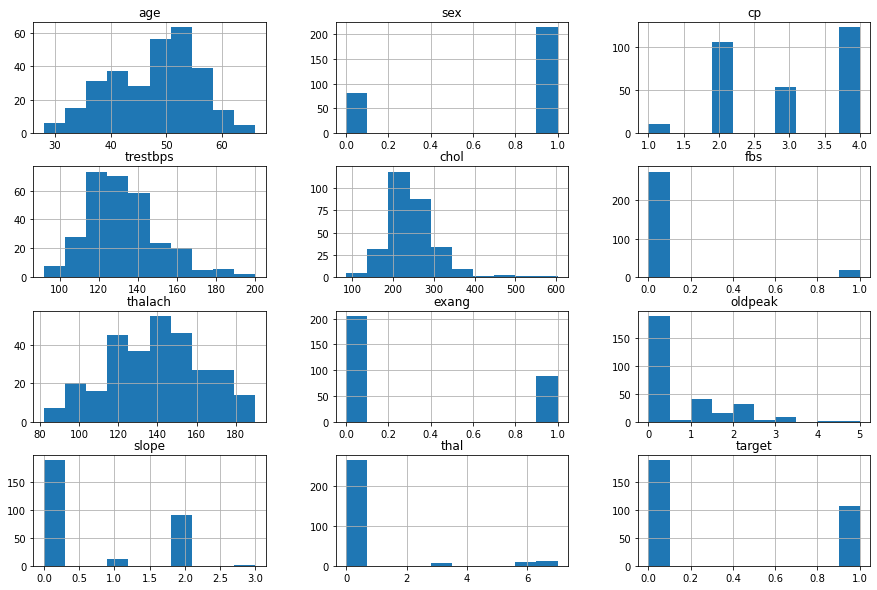

In [193]:
df.hist(figsize=(15,10))

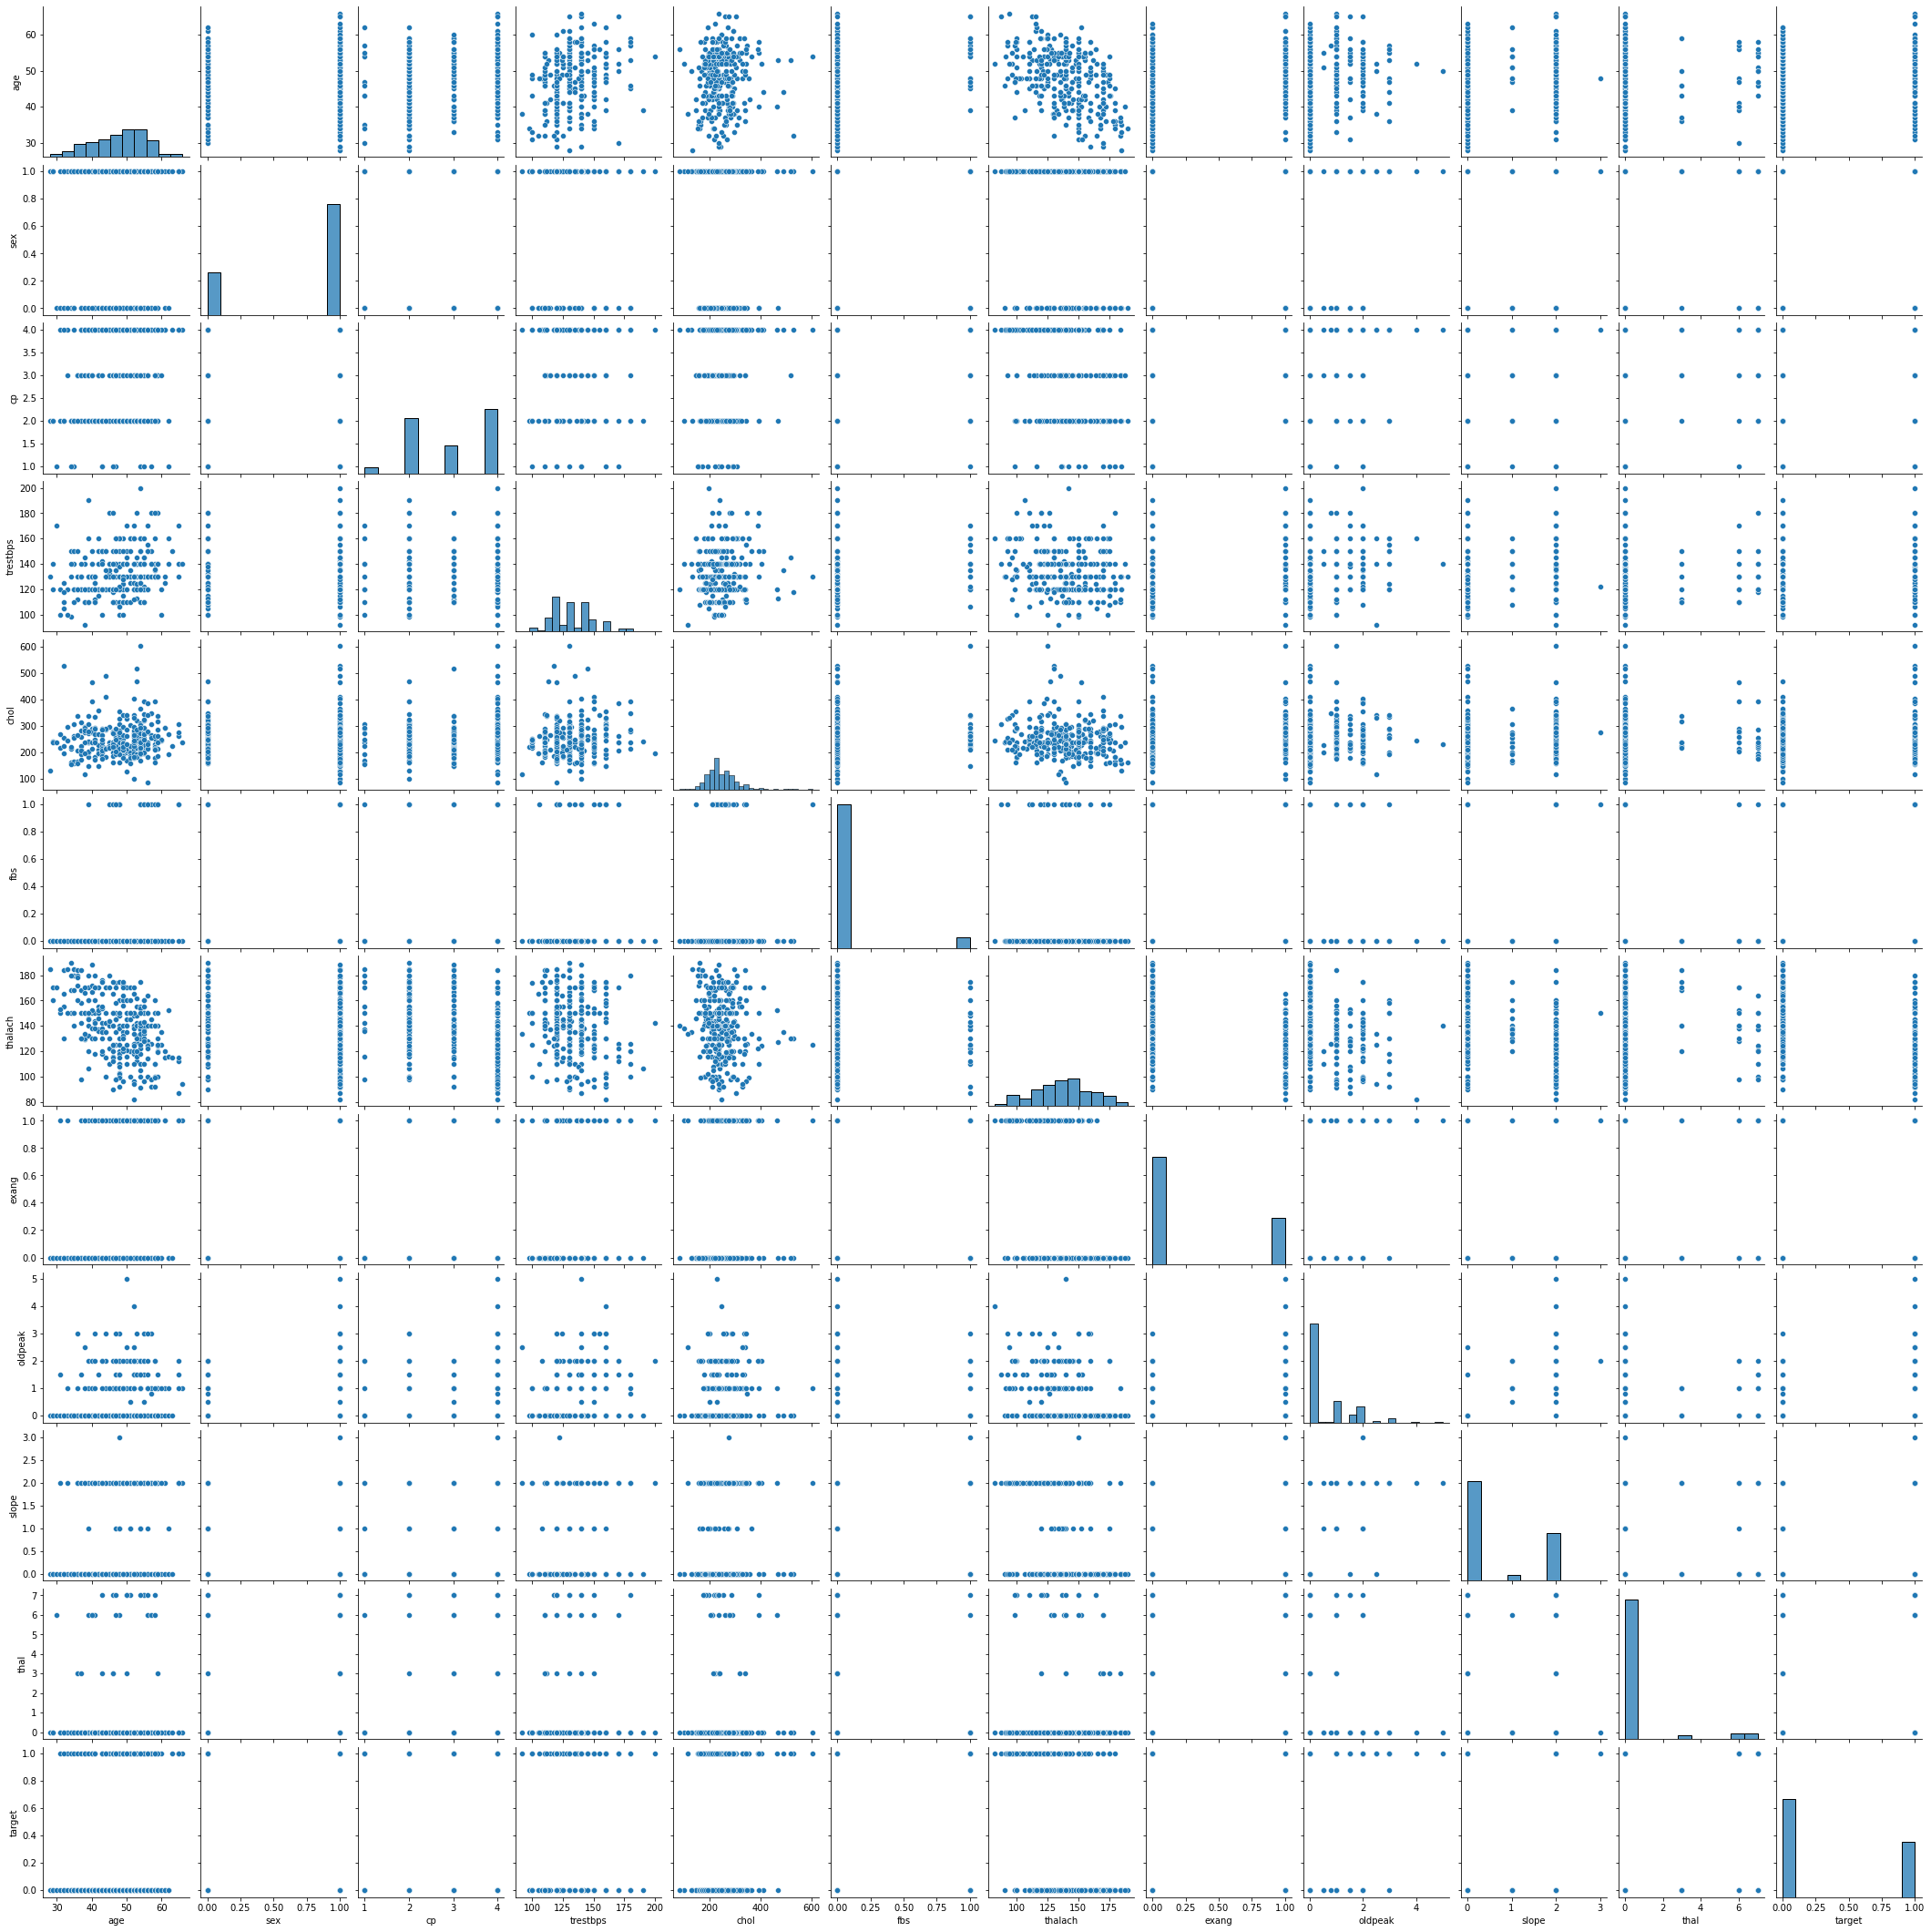

In [194]:
sns.pairplot(data=df)

### Step 5: Feature Selection 

In [174]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,0.013618,0.145826,0.245183,0.085735,0.180962,0.050407,-0.459416,0.238698,0.177707,0.220122,NaN,0.021567,0.159315
sex,0.013618,1.000000,0.249875,0.089519,0.028602,0.045663,-0.105503,-0.111482,0.157761,0.118931,0.067917,NaN,0.006747,0.272781
cp,0.145826,0.249875,1.000000,0.085986,0.136215,0.032810,-0.014687,-0.369909,0.495723,0.353109,0.404732,NaN,0.070898,0.505864
trestbps,0.245183,0.089519,0.085986,1.000000,0.078859,0.097277,0.012309,-0.184973,0.214020,0.205201,0.178407,NaN,-0.027445,0.139953
chol,0.085735,0.028602,0.136215,0.078859,1.000000,0.109138,0.052778,-0.121320,0.165395,0.111320,0.166510,NaN,0.032235,0.207013
fbs,0.180962,0.045663,0.032810,0.097277,0.109138,1.000000,0.048400,-0.070477,0.116010,0.063722,0.081528,NaN,0.017611,0.162869
restecg,0.050407,-0.105503,-0.014687,0.012309,0.052778,0.048400,1.000000,0.004884,0.042309,0.043192,0.016883,NaN,-0.040264,-0.031988
thalach,-0.459416,-0.111482,-0.369909,-0.184973,-0.121320,-0.070477,0.004884,1.000000,-0.401764,-0.301572,-0.352189,NaN,-0.024959,-0.331168
exang,0.238698,0.157761,0.495723,0.214020,0.165395,0.116010,0.042309,-0.401764,1.000000,0.625510,0.713192,NaN,0.077882,0.584541
oldpeak,0.177707,0.118931,0.353109,0.205201,0.111320,0.063722,0.043192,-0.301572,0.625510,1.000000,0.835301,NaN,0.003047,0.545700


<AxesSubplot:>

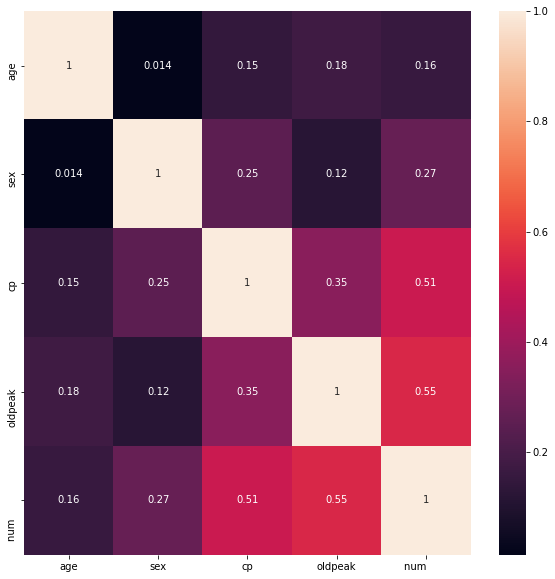

In [175]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True)

In [176]:
#Keeping the threshold greater than 0.1

df1 = df

df1.drop(['restecg', 'ca'], axis = 1, inplace = True)

### Step 6: Splitting the data into Train and Test Set

In [180]:
x = df.drop(['target'],axis = 1)

In [182]:
y = df['target']

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

### Step 7: Standardizing the data

In [185]:
from sklearn.preprocessing import StandardScaler

In [186]:
scaler = StandardScaler().fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [187]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
    
        
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(x_train, y_train)

print("Training accuracy of each model")

print("[1]KNN :", knn.score(x_train, y_train))
print("[2]Decision Tree :", tree.score(x_train, y_train))

Training accuracy of each model
[1]KNN : 0.8638297872340426
[2]Decision Tree : 1.0


In [188]:
#Clearly from above Decision Tree is leading to overfitting 
#KNN is appropriate to select

In [189]:
y_pred = knn.predict(x_test)

<AxesSubplot:>

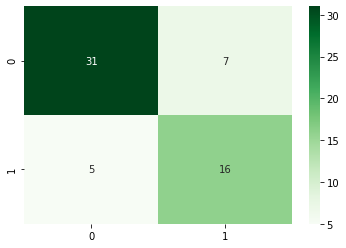

In [190]:
#Creating Confusion Matrix 
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt ='d', cmap = "Greens")

In [191]:
from sklearn.metrics import classification_report

TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

recall = TP / (TP + FN)
print("recall :", recall)

precision = TP / (TP + FP)
print("Precision :", precision)

f1_score = 2*((precision*recall)/(precision+recall))
print("f1 score :", f1_score)

matrix = classification_report(y_test, y_pred, labels=[1,0])
print('\n')
print('Classification Report :\n', matrix)


recall : 0.7619047619047619
Precision : 0.6956521739130435
f1 score : 0.7272727272727272


Classification Report :
               precision    recall  f1-score   support

           1       0.70      0.76      0.73        21
           0       0.86      0.82      0.84        38

    accuracy                           0.80        59
   macro avg       0.78      0.79      0.78        59
weighted avg       0.80      0.80      0.80        59



Maximum score =  0.864406779661017
At K = 9


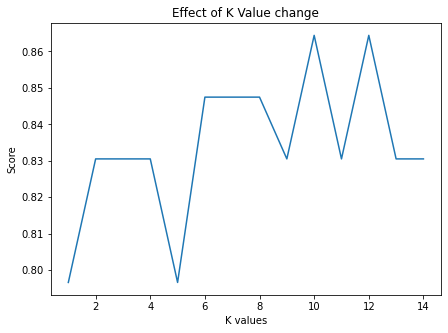

In [192]:
k_neighbours = np.arange(1,15,1)

scores=[]

for i in k_neighbours:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
    
plt.figure(figsize=(7,5))
plt.title('Effect of K Value change')
plt.xlabel("K values")
plt.ylabel("Score")
plt.plot(k_neighbours, scores)

print("Maximum score = ", max(scores))
print("At K =", scores.index(max(scores)))